<a href="https://colab.research.google.com/github/GenoKiller777/Visualizaciones/blob/main/CasoAnalisisCovidporRegion_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos-covid-por-region.csv to datos-covid-por-region.csv
User uploaded file "datos-covid-por-region.csv" with length 120073 bytes


---
# Analisis Covid-19 por Región

En este notebook graficaremos la evolución del Covid-19 en las distintas regiones. Los datos son extraidos desde:

[https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto3/CasosTotalesCumulativo_std.csv]

---

### Importar las librerías

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

### Bajar los datos

In [9]:
covid = pd.read_csv('/content/datos-covid-por-region.csv')

### Explorar los datos

In [16]:
covid.head(3)

,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0


In [17]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  4165 non-null   object 
 1   Fecha   4165 non-null   object 
 2   Total   4165 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.7+ KB


In [18]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,4165.0,28240.944058,84613.57113,0.0,342.0,2842.0,11007.0,513188.0


### Limpieza y validación de los datos

In [20]:
covid.count()

Region    4165
Fecha     4165
Total     4165
dtype: int64

In [23]:
covid.isna().sum()
#No hay valores faltantes

Region    0
Fecha     0
Total     0
dtype: int64

In [24]:
covid.duplicated(subset = ['Region','Fecha','Total']).sum()
#No hay valores duplicados

0

In [26]:
covid['Region'] = covid['Region'].astype('category')
covid['Fecha'] = pd.to_datetime(covid['Fecha'])
covid['Total'] = pd.to_numeric(covid['Total'])

### Fije el estilo bhm para los gráficos

In [28]:
from matplotlib import style
plt.style.use('bmh')

### Haga un gráfico que contenga la evolución del Covid-19 en Arica y Parinacota

In [30]:
covid_AricaParnacota = covid[covid['Region'] == 'Arica y Parinacota']

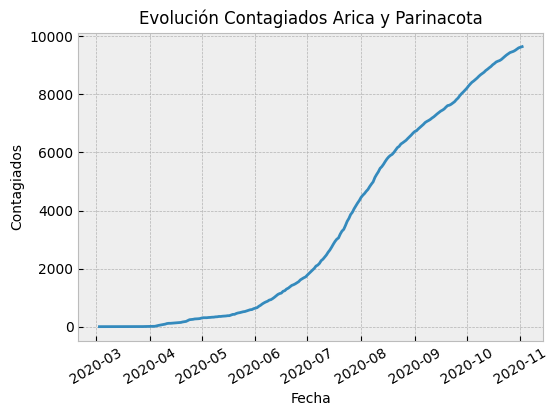

In [48]:
plt.figure(figsize=(6,4))
plt.plot(covid_AricaParnacota['Fecha'], covid_AricaParnacota['Total'])

plt.title('Evolución Contagiados Arica y Parinacota', fontsize = 12)
plt.xlabel('Fecha', fontsize = 10)
plt.ylabel('Contagiados', fontsize = 10)

plt.xticks(rotation = 30)
plt.show()

### Haga un gráfico que contenga las curvas de todas las regiones excepto la región metropolitana

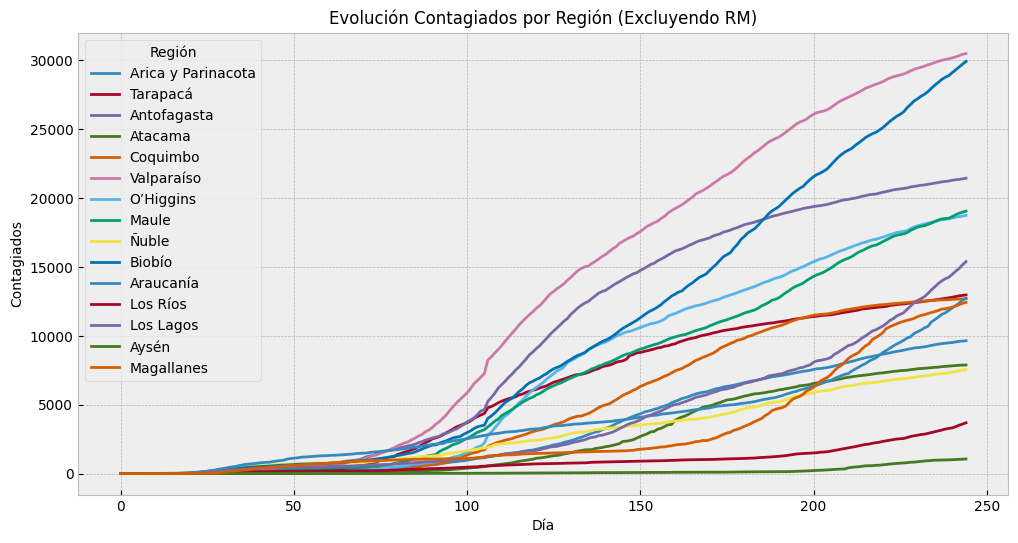

In [61]:
import warnings
warnings.filterwarnings('ignore')

regiones = covid.loc[~ covid ['Region'].isin(['Metropolitana','Total']),'Region'].unique()

fig, ax = plt.subplots(figsize = (12, 6))

for i, region in enumerate(regiones):
  covid_region = covid[covid['Region'] == region].copy()

  covid_region = covid_region.groupby('Fecha').sum()
  covid_region.reset_index(inplace = True)
  covid_region.drop('Fecha', axis = 1, inplace = True)

  ax.plot(covid_region['Total'], label = region)

plt.title('Evolución Contagiados por Región (Excluyendo RM)', fontsize = 12)
plt.xlabel('Día', fontsize = 10)
plt.ylabel('Contagiados', fontsize = 10)
ax.legend(title = 'Región')

plt.show()

### Haga un gráfico compuesto por sub-gráficos de la evolución de los contagios en cada región

In [74]:
covid_AricaParinacota = covid[covid['Region'] == 'Arica y Parinacota']
covid_Tarapaca = covid[covid['Region'] == 'Tarapacá']
covid_Antofagasta = covid[covid['Region'] == 'Antofagasta']
covid_Atacama = covid[covid['Region'] == 'Atacama']
covid_Coquimbo = covid[covid['Region'] == 'Coquimbo']
covid_Valparaiso = covid[covid['Region'] == 'Valparaíso']
covid_Metropolitana = covid[covid['Region'] == 'Metropolitana']
covid_OHiggins = covid[covid['Region'] == 'O’Higgins']
covid_Maule = covid[covid['Region'] == 'Maule']
covid_Nuble = covid[covid['Region'] == 'Ñuble']
covid_Biobio = covid[covid['Region'] == 'Biobío']
covid_Araucania = covid[covid['Region'] == 'Araucanía']
covid_Rios = covid[covid['Region'] == 'Los Ríos']
covid_Lagos = covid[covid['Region'] == 'Los Lagos']
covid_Aysen = covid[covid['Region'] == 'Aysén']
covid_Magallanes = covid[covid['Region'] == 'Magallanes']

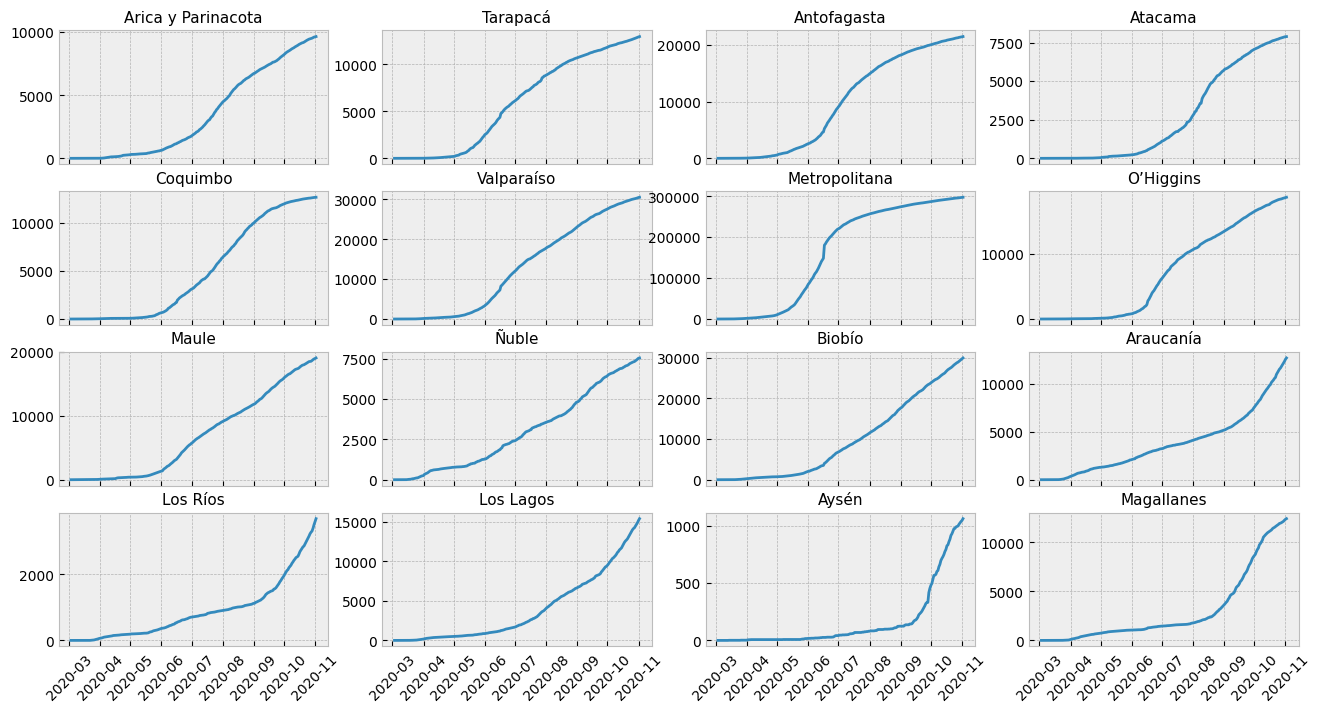

In [111]:

fig, ax = plt.subplots(4,4,figsize = (16, 8),sharex='col')


ax[0,0].plot(covid_AricaParinacota['Fecha'],covid_AricaParinacota['Total'])
ax[0,0].set_title('Arica y Parinacota', fontsize = 11)

ax[0,1].plot(covid_Tarapaca['Fecha'],covid_Tarapaca['Total'])
ax[0,1].set_title('Tarapacá', fontsize = 11)

ax[0,2].plot(covid_Antofagasta['Fecha'],covid_Antofagasta['Total'])
ax[0,2].set_title('Antofagasta', fontsize = 11)

ax[0,3].plot(covid_Atacama['Fecha'],covid_Atacama['Total'])
ax[0,3].set_title('Atacama', fontsize = 11)

ax[1,0].plot(covid_Coquimbo['Fecha'],covid_Coquimbo['Total'])
ax[1,0].set_title('Coquimbo', fontsize = 11)

ax[1,1].plot(covid_Valparaiso['Fecha'],covid_Valparaiso['Total'])
ax[1,1].set_title('Valparaíso', fontsize = 11)

ax[1,2].plot(covid_Metropolitana['Fecha'],covid_Metropolitana['Total'])
ax[1,2].set_title('Metropolitana', fontsize = 11)

ax[1,3].plot(covid_OHiggins['Fecha'],covid_OHiggins['Total'])
ax[1,3].set_title('O’Higgins', fontsize = 11)

ax[2,0].plot(covid_Maule['Fecha'],covid_Maule['Total'])
ax[2,0].set_title('Maule', fontsize = 11)

ax[2,1].plot(covid_Nuble['Fecha'],covid_Nuble['Total'])
ax[2,1].set_title('Ñuble', fontsize = 11)

ax[2,2].plot(covid_Biobio['Fecha'],covid_Biobio['Total'])
ax[2,2].set_title('Biobío', fontsize = 11)

ax[2,3].plot(covid_Araucania['Fecha'],covid_Araucania['Total'])
ax[2,3].set_title('Araucanía', fontsize = 11)

labels = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11']

ax[3,0].plot(covid_Rios['Fecha'],covid_Rios['Total'])
ax[3,0].set_title('Los Ríos', fontsize = 11)
ax[3,0].set_xticklabels(labels, rotation = 45)

ax[3,1].plot(covid_Lagos['Fecha'],covid_Lagos['Total'])
ax[3,1].set_title('Los Lagos', fontsize = 11)
ax[3,1].set_xticklabels(labels, rotation = 45)

ax[3,2].plot(covid_Aysen['Fecha'],covid_Aysen['Total'])
ax[3,2].set_title('Aysén', fontsize = 11)
ax[3,2].set_xticklabels(labels, rotation = 45)

ax[3,3].plot(covid_Magallanes['Fecha'],covid_Magallanes['Total'])
ax[3,3].set_title('Magallanes', fontsize = 11)
ax[3,3].set_xticklabels(labels, rotation = 45)

plt.show()

#### Haga un gráfico de torta con los contagios por región utilizando los datos del último día de medición

In [121]:
covid['Fecha'].max()

Timestamp('2020-11-02 00:00:00')

In [143]:
covid_last = covid[covid['Fecha'] == '2020-11-02 00:00:00']
covid_last = covid[covid['Region'] != 'Total']

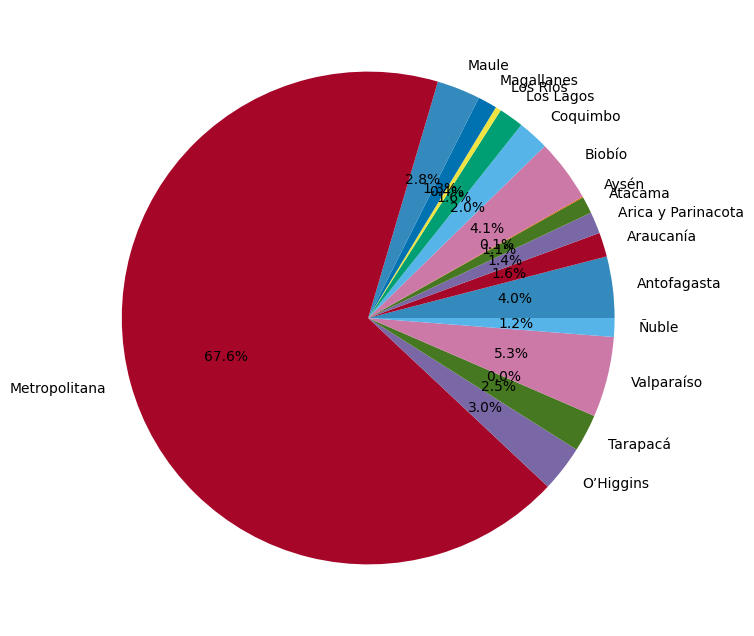

In [134]:
covid_last.groupby(['Region']).sum().plot(kind='pie', y='Total',figsize=(12,8),autopct='%1.1f%%',legend=None)

plt.ylabel('')
plt.show()

### Haga un gráfico de barras donde muestre todas las regiones excepto la metropolitana y los datos del último día

In [144]:
covid_last = covid_last[covid_last['Region'] != 'Metropolitana']

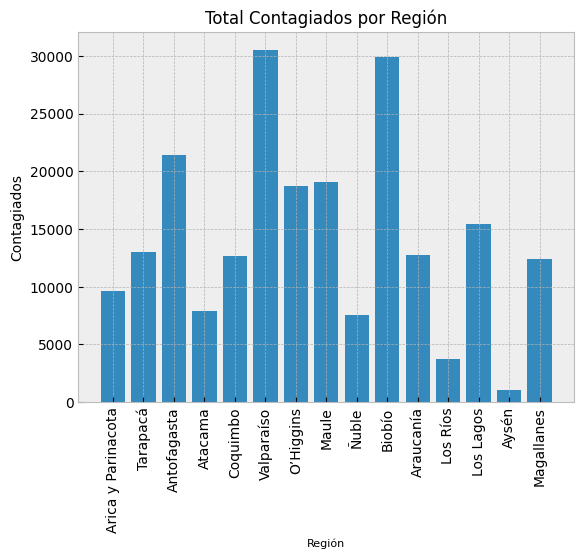

In [149]:
plt.bar(covid_last['Region'], covid_last['Total'])


plt.title('Total Contagiados por Región', fontsize = 12)
plt.xlabel('Región', fontsize = 8)
plt.ylabel('Contagiados', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()